In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

import pickle
import json

# 1-Problem statement

In [53]:
To predict charges for medical insurance using linear regression.

SyntaxError: invalid syntax (2716381705.py, line 1)

# 2 Data Gathering

In [54]:
df=pd.read_csv("medical_insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# 3 Exploratory Data Analysis (EDA):

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [56]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Detecting ouliers

age            AxesSubplot(0.125,0.11;0.168478x0.77)
bmi         AxesSubplot(0.327174,0.11;0.168478x0.77)
children    AxesSubplot(0.529348,0.11;0.168478x0.77)
charges     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

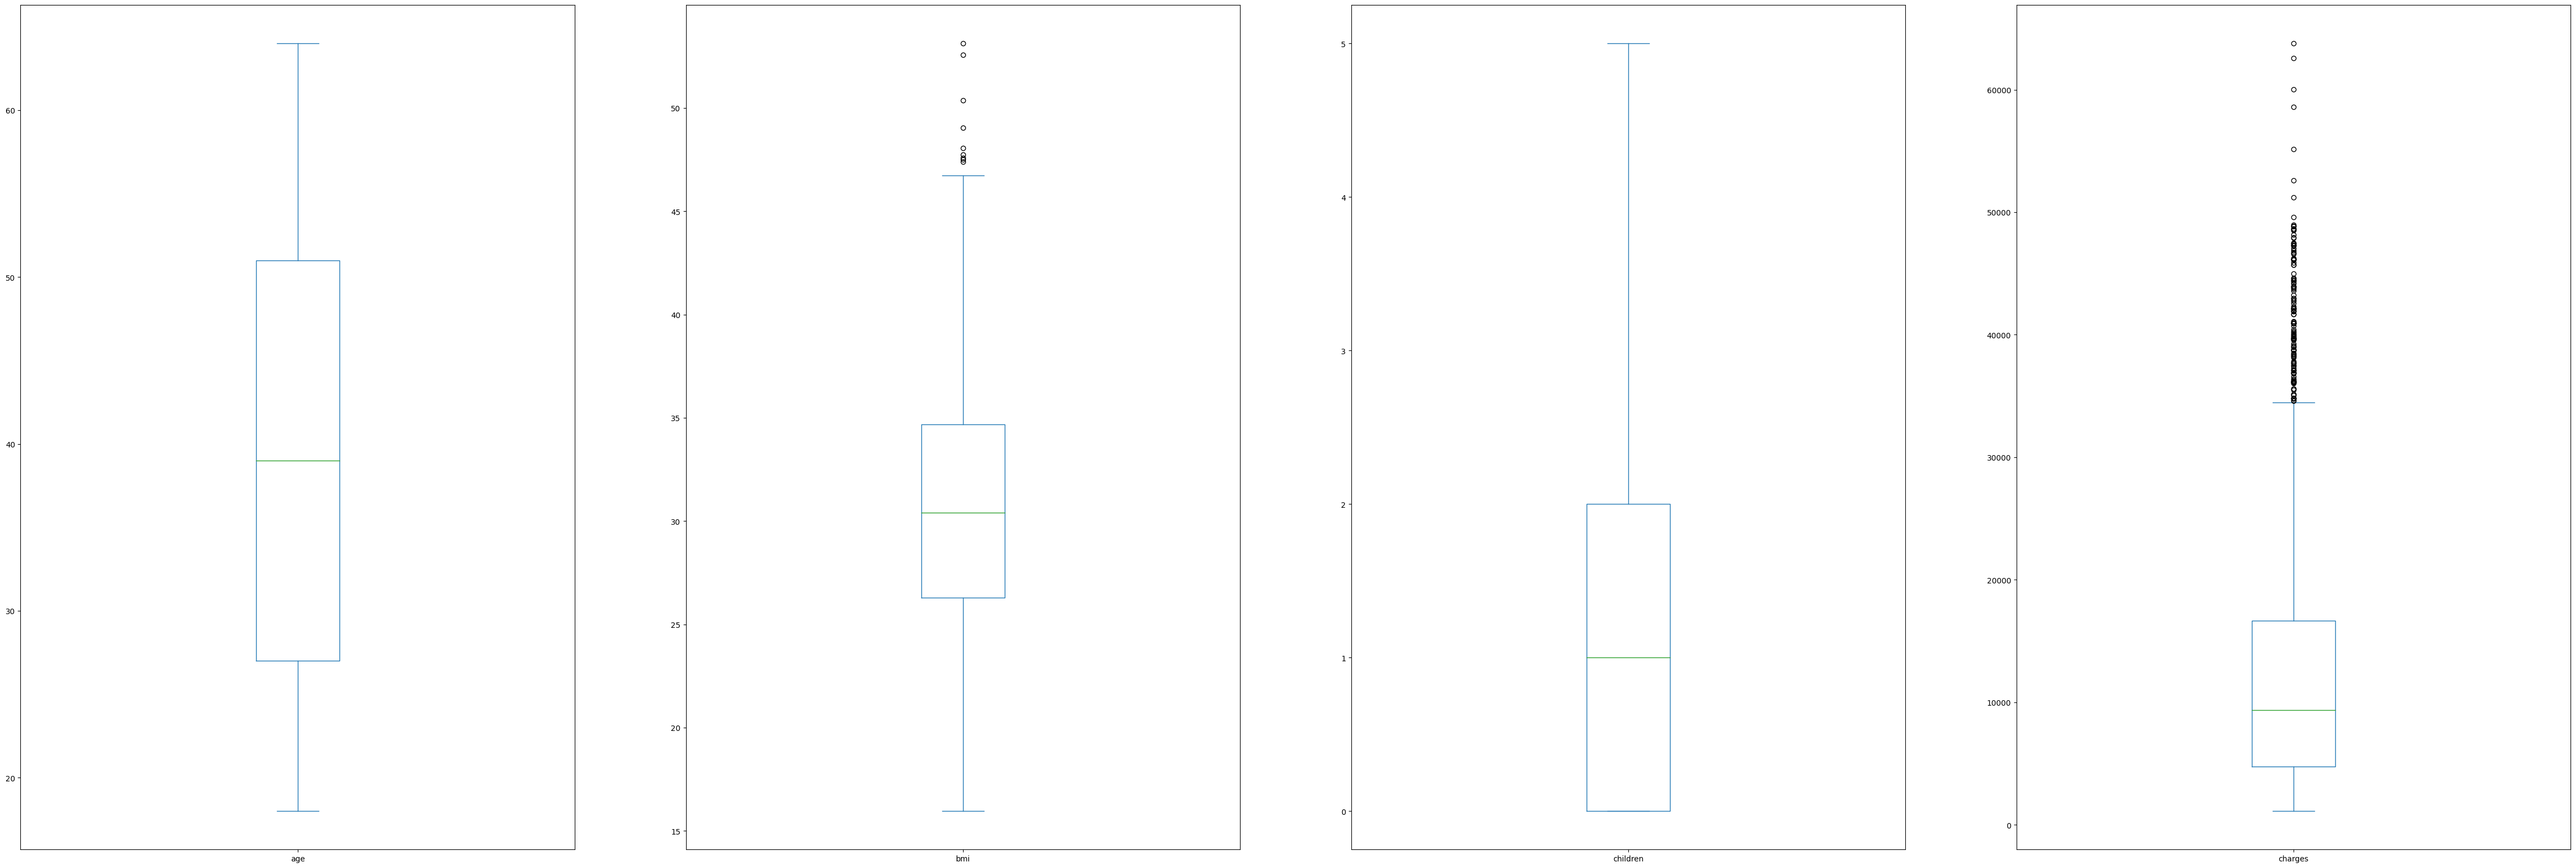

In [57]:
df.plot(kind="box",subplots=True,figsize=(60,20))

<AxesSubplot:xlabel='bmi'>

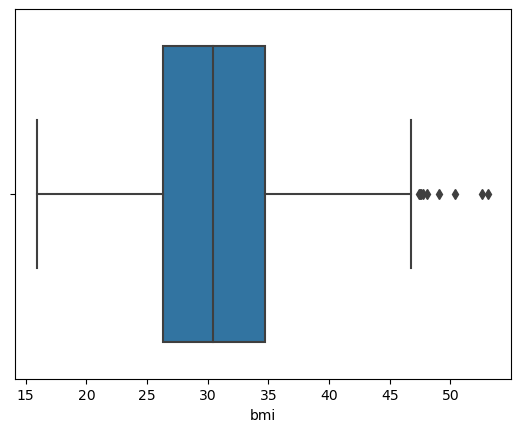

In [58]:
sns.boxplot(x=df["bmi"])

#### age column

<AxesSubplot:xlabel='age'>

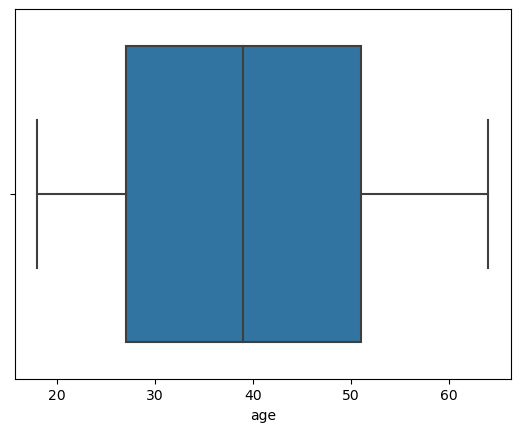

In [59]:
sns.boxplot(x=df["age"])

In [60]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# 4 Feature Engineering:

#### imputing outliers values

In [61]:
df["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [62]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
median = df['bmi'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)
print("*"*100)

Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
Median : 30.4
upper_tail : 47.290000000000006
lower_tail : 13.7
****************************************************************************************************


In [63]:
df['bmi'].loc[(df['bmi'] > upper_tail) | (df['bmi'] < lower_tail)] 

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [64]:
Median = df['bmi'].loc[(df['bmi'] <= upper_tail) & (df['bmi'] >= lower_tail)].median()
Median

30.3

In [65]:
df.loc[(df['bmi'] > upper_tail) | (df['bmi'] < lower_tail), 'bmi']  = Median

In [66]:
df['bmi'].loc[(df['bmi'] > upper_tail) | (df['bmi'] < lower_tail)] 


Series([], Name: bmi, dtype: float64)

<AxesSubplot:xlabel='bmi'>

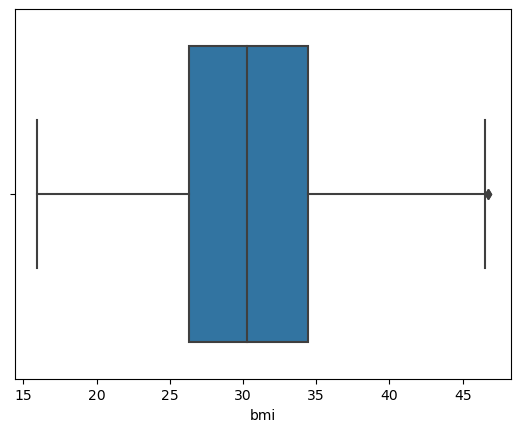

In [68]:
sns.boxplot(x= df["bmi"])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 1.sex 

In [70]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [71]:
df['sex'].replace({"female":0, "male":1}, inplace= True)

In [72]:
sex_value = {"female":0, "male":1}
sex_value

{'female': 0, 'male': 1}

#### 4.smoker

In [73]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [74]:
df['smoker'].replace({"no":0, "yes":1}, inplace= True)

In [75]:
smoker_value = {"no":0, "yes":1}
smoker_value

{'no': 0, 'yes': 1}

#### 5.region

In [76]:
df = pd.get_dummies(df, columns=['region'])
df

age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400                 0   
1      18    1  33.770         1       0   1725.55230                 0   
2      28    1  33.000         3       0   4449.46200                 0   
3      33    1  22.705         0       0  21984.47061                 0   
4      32    1  28.880         0       0   3866.85520                 0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830                 0   
1334   18    0  31.920         0       0   2205.98080                 1   
1335   18    0  36.850         0       0   1629.83350                 0   
1336   21    0  25.800         0       0   2007.94500                 0   
1337   61    0  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 10 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# 5.Feature Selection

In [78]:
df.corr()

age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020856  0.114273  0.042469 -0.025019  0.299008   
sex              -0.020856  1.000000  0.039736  0.017163  0.076185  0.057292   
bmi               0.114273  0.039736  1.000000  0.017377 -0.002943  0.190559   
children          0.042469  0.017163  0.017377  1.000000  0.007673  0.067998   
smoker           -0.025019  0.076185 -0.002943  0.007673  1.000000  0.787251   
charges           0.299008  0.057292  0.190559  0.067998  0.787251  1.000000   
region_northeast  0.002475 -0.002425 -0.135819 -0.022808  0.002811  0.006349   
region_northwest -0.000407 -0.011156 -0.128304  0.024806 -0.036945 -0.039905   
region_southeast -0.011642  0.017117  0.253677 -0.023066  0.068498  0.073982   
region_southwest  0.010016 -0.004184  0.000733  0.021914 -0.036945 -0.043210   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475         -0.000407         -0.011642   
sex                      -0.002425         -0.011156          0.017117   
bmi                      -0.135819         -0.128304          0.253677   
children                 -0.022808          0.024806         -0.023066   
smoker                    0.002811         -0.036945          0.068498   
charges                   0.006349         -0.039905          0.073982   
region_northeast          1.000000         -0.320177         -0.345561   
region_northwest         -0.320177          1.000000         -0.346265   
region_southeast         -0.345561         -0.346265          1.000000   
region_southwest         -0.320177         -0.320829         -0.346265   

                  region_southwest  
age                       0.010016  
sex                      -0.004184  
bmi                       0.000733  
children                  0.021914  
smoker                   -0.036945  
charges                  -0.043210  
region_northeast         -0.320177  
region_northwest         -0.320829  
region_southeast         -0.346265  
region_southwest          1.000000

In [79]:
df1=df.drop("charges",axis=1)
df1

age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19    0  27.900         0       1                 0                 0   
1      18    1  33.770         1       0                 0                 0   
2      28    1  33.000         3       0                 0                 0   
3      33    1  22.705         0       0                 0                 1   
4      32    1  28.880         0       0                 0                 1   
...   ...  ...     ...       ...     ...               ...               ...   
1333   50    1  30.970         3       0                 0                 1   
1334   18    0  31.920         0       0                 1                 0   
1335   18    0  36.850         0       0                 0                 0   
1336   21    0  25.800         0       0                 0                 0   
1337   61    0  29.070         0       1                 0                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1338 rows x 9 columns]

<AxesSubplot:>

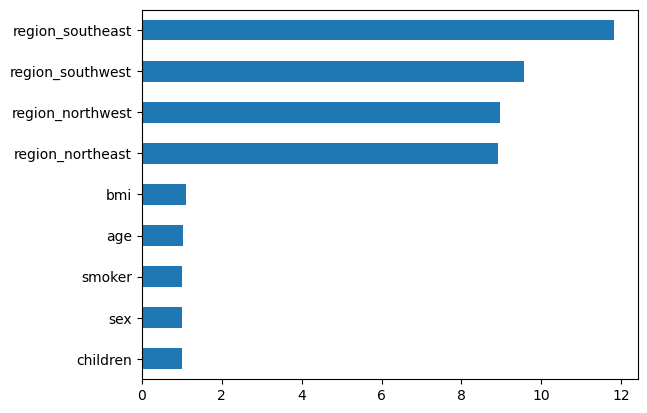

In [80]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=df1.columns)
s1.sort_values().plot(kind = 'barh')

# 6-ModelBuilding

In [81]:
x = df.drop('charges', axis= 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)
x_train

age  sex     bmi  children  smoker  region_northeast  region_northwest  \
316    50    1  32.205         0       0                 0                 1   
340    24    0  27.600         0       0                 0                 0   
151    48    1  29.700         0       0                 0                 0   
1282   18    0  21.660         0       1                 1                 0   
557    34    1  34.210         0       0                 0                 0   
...   ...  ...     ...       ...     ...               ...               ...   
583    32    0  23.650         1       0                 0                 0   
332    61    0  31.160         0       0                 0                 1   
1293   46    1  25.745         3       0                 0                 1   
1115   55    1  32.670         1       0                 0                 0   
1104   37    1  29.800         0       0                 0                 0   

      region_southeast  region_southwest  
316                  0                 0  
340                  0                 1  
151                  1                 0  
1282                 0                 0  
557                  1                 0  
...                ...               ...  
583                  1                 0  
332                  0                 0  
1293                 0                 0  
1115                 1                 0  
1104                 0                 1  

[1070 rows x 9 columns]

#### create an instance of model


In [82]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [83]:
# Model Evaluation for Testing Data
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 27523934.7722308
Root Mean Sqaured Error : 5246.3258354996215
Mean Absolute Error : 3780.5153606917597
R Squared Value : 0.8015189494712378
Adjusted R Squared Value : 0.7945951918946531


In [84]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 39093416.86269204
Root Mean Sqaured Error : 6252.472859812511
Mean Absolute Error : 4303.040693780995
R Squared Value : 0.7367268644649843
Adjusted R Squared Value : 0.7344915265217624


In [85]:
x.head(1).T

0
age               19.0
sex                0.0
bmi               27.9
children           0.0
smoker             1.0
region_northeast   0.0
region_northwest   0.0
region_southeast   0.0
region_southwest   1.0

In [86]:
column_names = x.columns
len(column_names)

9

In [87]:
with open("Linear model.pkl", "wb") as f:
    pickle.dump(model, f)

In [93]:
json_data = {"sex":sex_value, 
            "smoker":smoker_value,
            "columns":list(column_names)}
json_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [94]:
with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

# Single user Input Testing

In [88]:
age = 26.0
sex = "female"
bmi = 30.9
children = 0.0
smoker = "no"
region = "northwest"

region = "region_" + region
region

region_index = np.where(column_names == region)[0][0]
region_index

6

In [89]:
x.shape[1]

9

In [95]:
json_data['columns']

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [96]:
test_array = np.zeros(len(column_names))

test_array[0] = age
test_array[1] = json_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = json_data['smoker'][smoker]
test_array[region_index] = 1

test_array

array([26. ,  0. , 30.9,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ])

In [97]:
charges = round(model.predict([test_array])[0],2)
print("Predicted Medical Insurance Charges is :", charges, "/- Rs. Only")

Predicted Medical Insurance Charges is : 4808.37 /- Rs. Only


In [99]:
data = dict([('age', '84'), ('sex', 'male'), ('bmi', '24'), ('children', '2'), ('smoker', 'no'), ('region', 'northeast')])
data

{'age': '84',
 'sex': 'male',
 'bmi': '24',
 'children': '2',
 'smoker': 'no',
 'region': 'northeast'}